In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import tensorflow as tf

train_df = df.sample(frac=0.7, random_state=0)
test_df = df.drop(train_df.index)

In [ ]:
maxTest = test_df.max(axis = 0)
minTest = test_df.min(axis = 0)

range = maxTest - minTest
train_df = (train_df - minTest)/range
test_df = (test_df - minTest)/range

In [ ]:
X_train = train_df.drop('quality', axis=1)
y_train = train_df['quality']

X_test = test_df.drop('quality', axis=1)
y_test = test_df['quality']

input_shape = X_train.shape[1]
input_shape


11

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[input_shape]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
losses = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size = 256)

Epoch 1/15
5/5 [==============================] - 2s 84ms/step - loss: 0.2567 - val_loss: 0.1223
Epoch 2/15
5/5 [==============================] - 0s 20ms/step - loss: 0.0741 - val_loss: 0.0411
Epoch 3/15
5/5 [==============================] - 0s 17ms/step - loss: 0.0401 - val_loss: 0.0582
Epoch 4/15
5/5 [==============================] - 0s 15ms/step - loss: 0.0544 - val_loss: 0.0530
Epoch 5/15
5/5 [==============================] - 0s 22ms/step - loss: 0.0422 - val_loss: 0.0378
Epoch 6/15
5/5 [==============================] - 0s 18ms/step - loss: 0.0314 - val_loss: 0.0357
Epoch 7/15
5/5 [==============================] - 0s 17ms/step - loss: 0.0312 - val_loss: 0.0367
Epoch 8/15
5/5 [==============================] - 0s 20ms/step - loss: 0.0312 - val_loss: 0.0336
Epoch 9/15
5/5 [==============================] - 0s 17ms/step - loss: 0.0281 - val_loss: 0.0300
Epoch 10/15
5/5 [==============================] - 0s 21ms/step - loss: 0.0263 - val_loss: 0.0286
Epoch 11/15
5/5 [============

In [ ]:
model.predict(X_test)

15/15 [==============================] - 0s 4ms/step


array([[0.44294485],
       [0.48720342],
       [0.43544134],
       [0.5445993 ],
       [0.3984329 ],
       [0.44842616],
       [0.38441697],
       [0.4189516 ],
       [0.43670025],
       [0.4373146 ],
       [0.52634555],
       [0.5306532 ],
       [0.48506495],
       [0.53380007],
       [0.4725865 ],
       [0.44416893],
       [0.47670564],
       [0.50834256],
       [0.5093549 ],
       [0.45294985],
       [0.4794436 ],
       [0.52312154],
       [0.42859504],
       [0.4732832 ],
       [0.42859504],
       [0.4732832 ],
       [0.590831  ],
       [0.47152022],
       [0.43050888],
       [0.43050888],
       [0.50945884],
       [0.41554707],
       [0.41787124],
       [0.47563812],
       [0.4834505 ],
       [0.45928523],
       [0.5807285 ],
       [0.5113179 ],
       [0.37902436],
       [0.51218724],
       [0.5019396 ],
       [0.4507238 ],
       [0.47079164],
       [0.42332646],
       [0.47272295],
       [0.40741733],
       [0.5714588 ],
       [0.645

In [ ]:
y_test

0       0.4
3       0.6
7       0.8
11      0.4
23      0.4
       ... 
1573    0.6
1575    0.6
1576    0.6
1584    0.8
1594    0.4
Name: quality, Length: 480, dtype: float64

<Axes: >

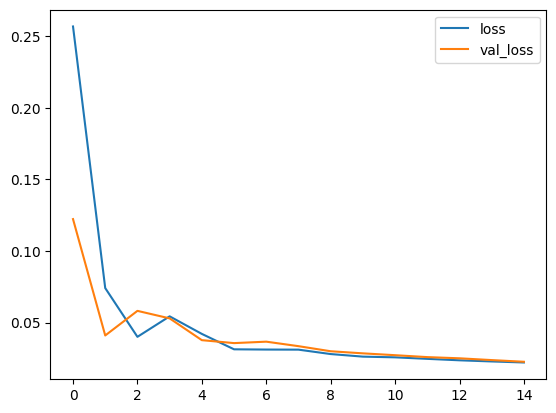

In [ ]:
loss_df = pd.DataFrame(losses.history)
loss_df.plot()

In [ ]:
import datetime
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5536 - sparse_categorical_accuracy: 0.8000
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4189 - sparse_categorical_accuracy: 0.8490
Epoch 3/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3834 - sparse_categorical_accuracy: 0.8618
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3619 - sparse_categorical_accuracy: 0.8675
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3440 - sparse_categorical_accuracy: 0.8732
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3377 - sparse_categorical_accuracy: 0.8760
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3256 - sparse_categorical_accuracy: 0.8785
Epoch 8/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3142 - sparse_categorical_accuracy: 0.8835
Epoch 9/20
1875/1875 [==

In [ ]:
y_test = np.array(y_test, dtype=int)
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3289 - sparse_categorical_accuracy: 0.8815
